lesson1-sgd.ipynb

Replicating: https://github.com/fastai/fastai/blob/master/courses/dl1/lesson1-sgd.ipynb

In [2]:
%matplotlib inline
import math, sys, os, numpy as np
import torch
from matplotlib import pyplot as plt, rcParams, animation, rc
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

## Components of Learning:

* **Representation**: space of allowed models
    * Exmpl: (1) Logistic Regression, (2) 3-Layer Feedforward Neural Network
* **Evaluation**: how do you judge or prefer one model over another (loss function, utility function)
* **Optimization**: how do you search the space of models to obtain better evaluation

## Linear Regression problem:

the goal of linear regression is to fit a line to a set of points:

In [3]:
# Generating fake data
def lin(a,b,x): return a*x+b

def gen_fake_data(n, a, b):
    x = s = np.random.uniform(0,1,n)
    y = lin(a,b,x) + 0.1 * np.random.normal(0,3,n)
    return x, y
x, y = gen_fake_data(50, 3., 8.)

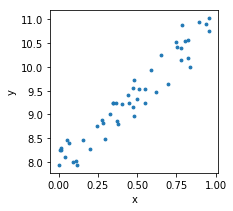

In [4]:
plt.scatter(x,y, s=8); plt.xlabel("x"); plt.ylabel("y");

You want to find parameters (weights) `a` and `b` such that you minimize the *error* btwn the points and the line `a * x + b`. Note that `a` and `b` are unknown. For a regression problem, the most common *error function* or *loss function* is the **mean squared error**.

In [5]:
def mean_square_error(y_hat, y):
    return np.power(y_hat - y, 2).mean()

In [6]:
# say our prediction is a=10, b=5; computing our error:
y_hat = lin(10,5,x)
mean_square_error(y_hat, y)

4.1190

## Gradient Descent

In [8]:
# generate some more data
x, y = gen_fake_data(10000, 3., 8.)

In [9]:
print(x.shape, y.shape)

(10000,) (10000,)


In [10]:
dtype = torch.cuda.FloatTensor

In [11]:
# from NumPy to PyTorch
x = torch.from_numpy(x)
y = torch.from_numpy(y)

In [12]:
from torch.autograd import Variable
# Create random Tensors to hold x and y, and wrap them in Variables.
# Setting requires_grad=False indicates that we don't need to compute gradients
# wrt to these Variables.
x = Variable(x.type(dtype), requires_grad=False)
y = Variable(y.type(dtype), requires_grad=False)

In [14]:
# Create random Tensors for weights a and b, ard wrap them in Variables.
# Setting requires_grad+True indicates that we want to compute gradients wrt
# these Variables.
a = Variable(torch.randn(1).type(dtype), requires_grad=True)
b = Variable(torch.randn(1).type(dtype), requires_grad=True)

a.grad = Variable(dtype(a.size()).zero_())
b.grad = Variable(dtype(b.size()).zero_())

In [15]:
a, b

(Variable containing:
  1.0260
 [torch.cuda.FloatTensor of size 1 (GPU 0)], Variable containing:
 -0.4221
 [torch.cuda.FloatTensor of size 1 (GPU 0)])

In [16]:
learning_rate = 1e-3
for t in range(10000):
    # Forward pass: copmute predicted y using operatiosn on Variables
    y_pred = x * a + b
    loss = (y_pred - y).pow(2).mean()
    if t % 1000 == 0: print(loss.data)
        
    # Manually zero the gradients
    a.grad.data.zero_()
    b.grad.data.zero_()
    
    # Computes the gradient of loss wrt all Variables with requires_grad=True
    # After this call a.grad and b.grad will be Variables holding the gradient 
    # of the loss wrt a and b respectively.
    loss.backward()
    
    # Update a and b using gradient descent; a.data and b.data are Tensors, 
    # a.grad and b.grad are Variables and a.grad.data and b.grad.data are 
    # Tensors.
    a.data -= learning_rate * a.grad.data
    b.data -= learning_rate * b.grad.data


 88.9667
[torch.cuda.FloatTensor of size 1 (GPU 0)]


 0.8947
[torch.cuda.FloatTensor of size 1 (GPU 0)]


 0.2872
[torch.cuda.FloatTensor of size 1 (GPU 0)]


 0.2394
[torch.cuda.FloatTensor of size 1 (GPU 0)]


 0.2052
[torch.cuda.FloatTensor of size 1 (GPU 0)]


 0.1789
[torch.cuda.FloatTensor of size 1 (GPU 0)]


 0.1587
[torch.cuda.FloatTensor of size 1 (GPU 0)]


 0.1431
[torch.cuda.FloatTensor of size 1 (GPU 0)]


 0.1310
[torch.cuda.FloatTensor of size 1 (GPU 0)]


 0.1218
[torch.cuda.FloatTensor of size 1 (GPU 0)]



In [17]:
print(a, b)

Variable containing:
 3.5324
[torch.cuda.FloatTensor of size 1 (GPU 0)]
 Variable containing:
 7.7169
[torch.cuda.FloatTensor of size 1 (GPU 0)]



#### Stochasting Gradient Descent (SGD)

### Visualizing Gradient Descent

In [18]:
x, y = gen_fake_data(50, 3., 8.)

In [19]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/y.shape[0])

In [20]:
a_guess = -1.
b_guess = 1.
avg_loss(y, a_guess, b_guess, x)

9.0679

In [21]:
lr = 0.01
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x * dydb
    a_guess -= lr * dyda.mean()
    b_guess -= lr * dydb.mean()

In [22]:
fig = plt.figure(dpi=100, figsize=(5,4))
plt.scatter(x,y)
line, = plt.plot(x, lin(a_guess, b_guess, x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess, b_guess, x))
    for i in range(30): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)

In [23]:
ani